# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
# Creating foodhub_data DataFrame to store data

path_to_file = './data/foodhub_order.csv'
foodhub_data = pd.read_csv(path_to_file)

In [5]:
# Write your code here to view the first 5 rows
foodhub_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Get the rows and column from foodhub_data

rows = foodhub_data.shape[0]
columns = foodhub_data.shape[1]

print(f'Number of rows: {rows}')
print(f'Number of colums: {columns}')


Number of rows: 1898
Number of colums: 9


#### Observations:

*   Number of rows: 1898
*   Number of colums: 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Viewing the metadata of foodhub_data
foodhub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We can see :
*   *order_id, customer_id, food_preparation_time* and *delivery_time* are integers
*   *restaurant_name, cuisine_type, day_of_the_week* and *rating* are objects.
*   *cost_of_the_order* is float.
*   There are orders which do not have any rating (instead the value is "Not given")  




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Finding Columns with blank data
foodhub_data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
The given dataset does not have any blank value in any of the columns.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Getting statictical data from the dataset
foodhub_data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Statistical summary on time taken to prepare the food:
* The least time that took was 20 minutes.
* The most time that took to prepare the food was 35 minutes.
* On an average it takes 27.37 minutes to prepare the food.


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Orders with no rating
order_with_no_rating = foodhub_data[foodhub_data['rating'] == 'Not given'].shape[0]
print(f'Number of Orders that are not rated : {order_with_no_rating}')

Number of Orders that are not rated : 736


#### Observations:
* Out of 1898 orders, 736 of them do not have any ratings. This is 38.7% of the available data.

In [11]:
foodhub_data['order_id'].nunique()

1898

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

##### Order ID




In [12]:
# checking for unique orders
unique_orders = foodhub_data['order_id'].nunique()
print(f'Number of unique orders: {unique_orders}')

Number of unique orders: 1898


####Customer ID

In [13]:
# checking for unique Customers
unique_customers = foodhub_data['customer_id'].nunique()
print(f'Number of unique customers: {unique_customers}')

Number of unique customers: 1200


####Restaurant name

In [14]:
# checking for unique restaurants
unique_restaurants = foodhub_data['restaurant_name'].nunique()
print(f'Number of unique restaurants: {unique_restaurants}')

Number of unique restaurants: 178


####Cuisine Type

Number of unique cuisines: 14


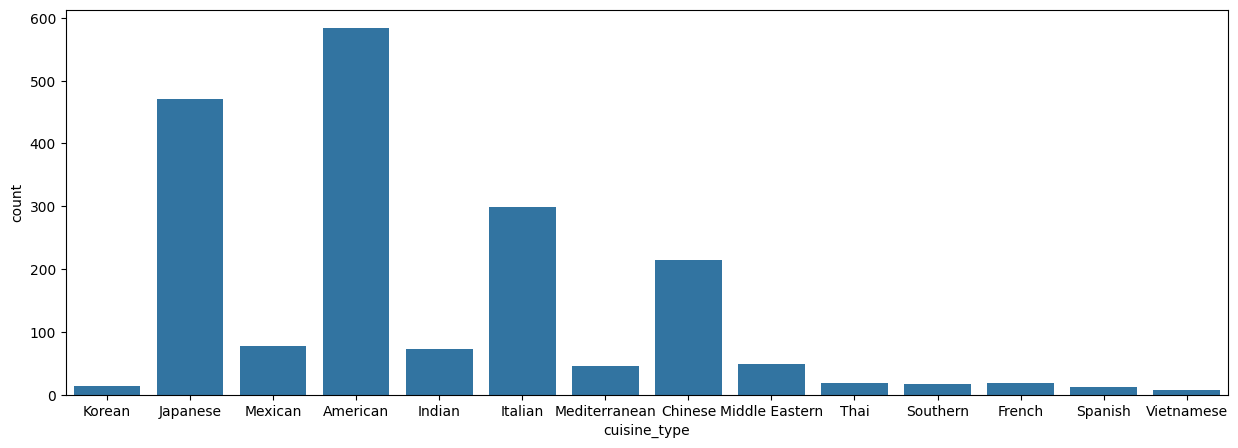

In [15]:
# checking for unique cuisines
unique_cuisines = foodhub_data['cuisine_type'].nunique()
print(f'Number of unique cuisines: {unique_cuisines}')

# Getting count of cuisine type
plt.figure(figsize = (15,5))
sns.countplot(data = foodhub_data, x = 'cuisine_type') ;

####Cost of the order

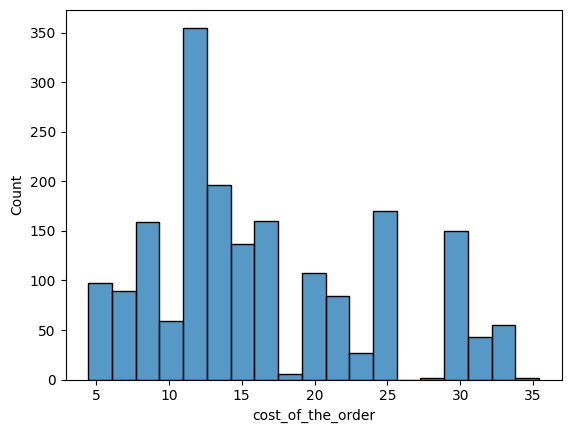

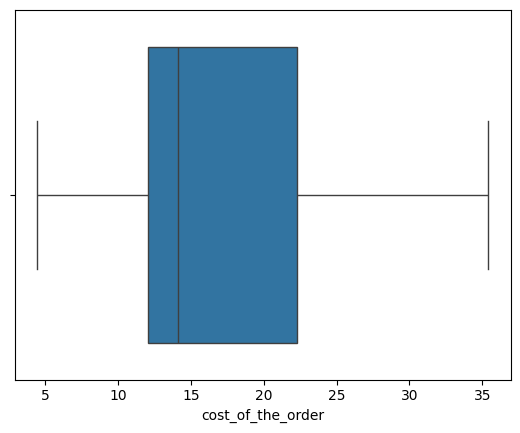

In [16]:
# Histogram for the cost of order
sns.histplot(data=foodhub_data,x='cost_of_the_order')
plt.show()
# Boxplot for the cost of order
sns.boxplot(data=foodhub_data,x='cost_of_the_order')
plt.show()

####Day of week

Number of unique days: 2


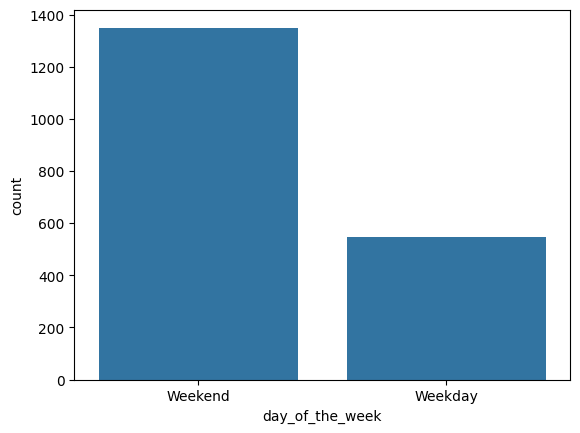

In [17]:
# checking for unique days of the week
unique_days = foodhub_data['day_of_the_week'].nunique()
print(f'Number of unique days: {unique_days}')

# Getting count of day of the week
sns.countplot(data = foodhub_data, x = 'day_of_the_week') ;

####Rating

Number of unique rating: 4


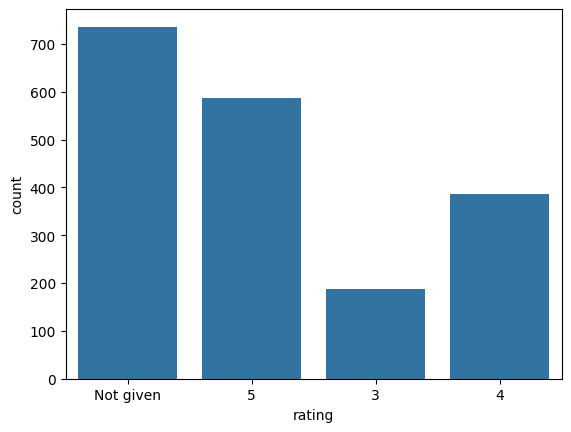

In [18]:
# checking for unique rating
unique_rating = foodhub_data['rating'].nunique()
print(f'Number of unique rating: {unique_rating}')

# Getting count of rating
sns.countplot(data = foodhub_data, x = 'rating') ;

####Food Preparation Time

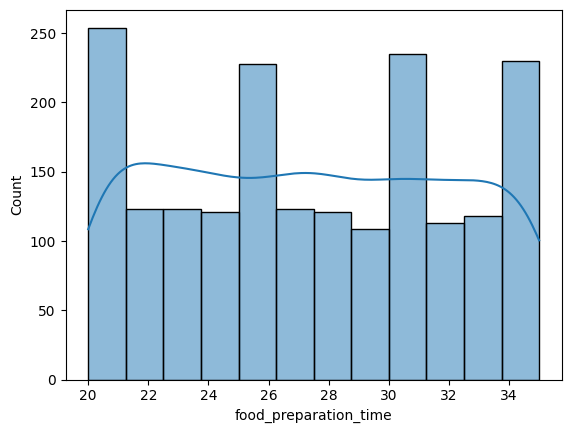

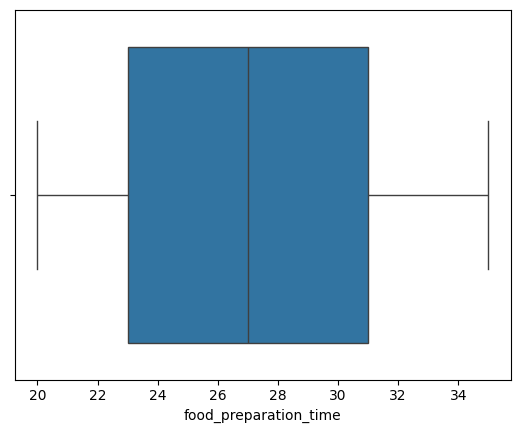

In [19]:
# Histogram for the Food Preparation time
sns.histplot(data=foodhub_data,x='food_preparation_time',kde=True)
plt.show()
# Boxplot for the Food Preparation Time
sns.boxplot(data=foodhub_data,x='food_preparation_time')
plt.show()

####Delivery time

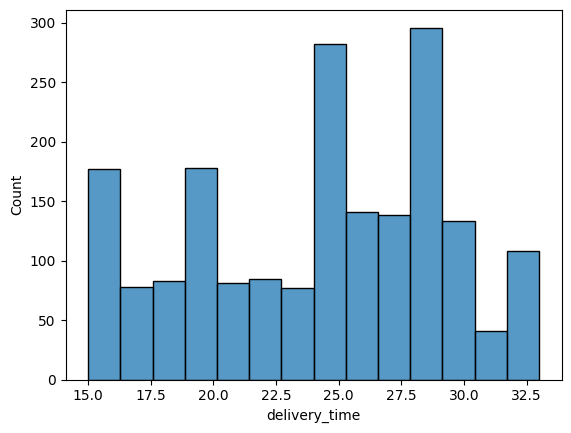

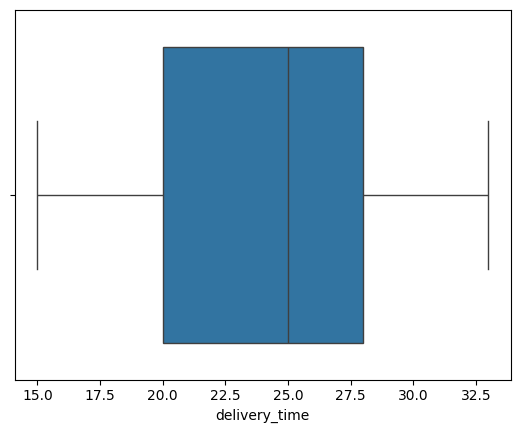

In [20]:
# Histogram for the delivery time
sns.histplot(data=foodhub_data,x='delivery_time')
plt.show()
# Boxplot for the delivery time
sns.boxplot(data=foodhub_data,x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# 5 restaurants in terms of the number of orders
foodhub_data['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
* Restaurant with most orders is *Shake Shack* which is 34.5% of top 5 orders received.
* It is followed by *The Meatball Shop* and *Blue Ribbon Shushi* which are 20.8% and 18.76% respectively.
* *Blue Ribbon Fried Chicken* and *Parm* are in bottom two of top 5 list.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# Top 5 popular cuisine on weekends
foodhub_data[foodhub_data['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1)

,count
cuisine_type,
American,415


#### Observations:
* American cuisines are the most Popular on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
# Percentage more than 20 dollars
more_than_20_dollar = foodhub_data[foodhub_data['cost_of_the_order']>20].shape[0]
total_number_of_order = foodhub_data.shape[0]

result = (more_than_20_dollar/total_number_of_order)*100
print(f'Percentage of orders that cost more than 20 dollars: {round(result,2)}%')

Percentage of orders that cost more than 20 dollars: 29.24%


#### Observations:
Percentage of orders that cost more than 20 dollars: 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# Calculate mean order delivery time
mean_delivery_time = foodhub_data['delivery_time'].mean()
print(f'Mean order delivery time: {round(mean_delivery_time,2)} minutes')

Mean order delivery time: 24.16 minutes


#### Observations:
Mean order delivery time: 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
# Top 3 customers based on frequency of orders
foodhub_data['customer_id'].value_counts().sort_values(ascending=False).head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Top 3 customer with most orders placed
* Customer 52832 with 13 orders.
* Customer 47440 with 10 orders.
* Customer 83287 with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine Type and the Cost of Order

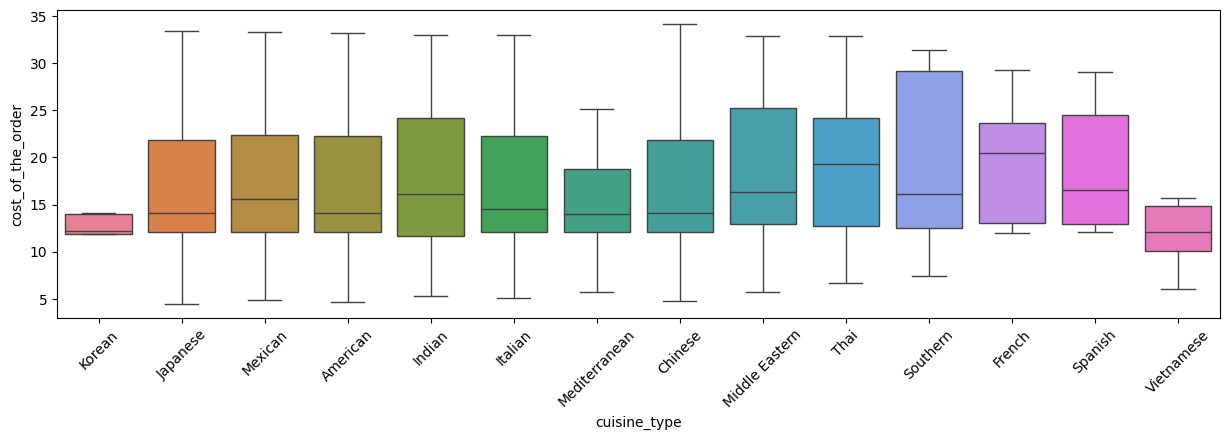

In [39]:
# Plotting between cost of the order and cuisine type
plt.figure(figsize=(15,4))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = foodhub_data, hue = "cuisine_type",showfliers=False)
plt.xticks(rotation = 45)
plt.show()

#### Cuisine Type and Food Preparation Time

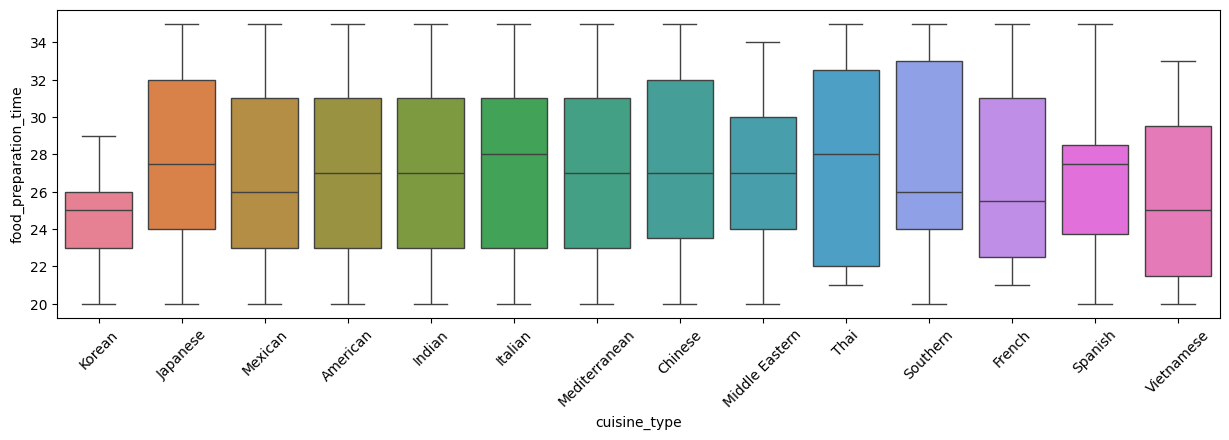

In [44]:
# Plotting between food prep time and cuisine type
plt.figure(figsize=(15,4))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = foodhub_data, hue = "cuisine_type",showfliers=False)
plt.xticks(rotation = 45)
plt.show()

#### Rating with Delivery Time

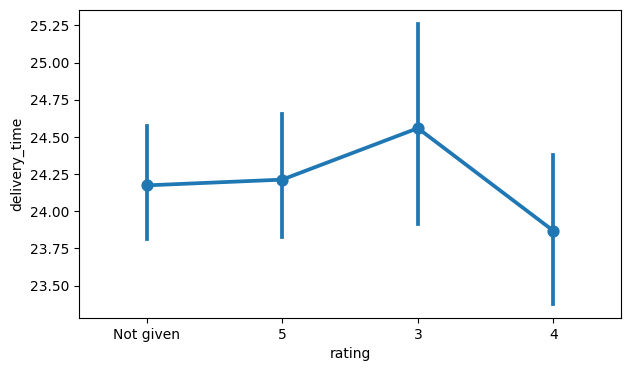

In [72]:
# Plotting between rating and delivery time
plt.figure(figsize=(7, 4))
sns.pointplot(x = 'rating', y = 'delivery_time', data = foodhub_data)
plt.show()

####Rating with Food Preparation Time

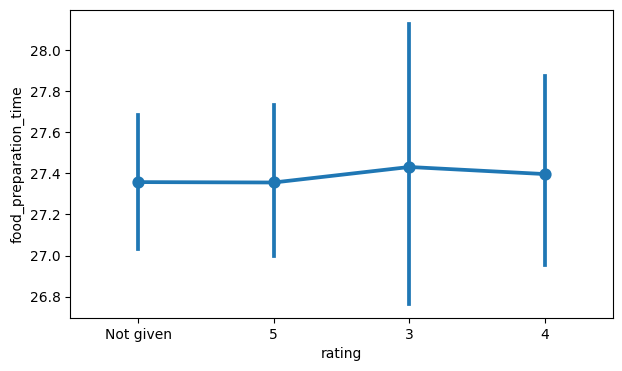

In [73]:
# Plotting between rating and Food Prep time
plt.figure(figsize=(7, 4))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = foodhub_data)
plt.show()

#### Rating with Cost of Order

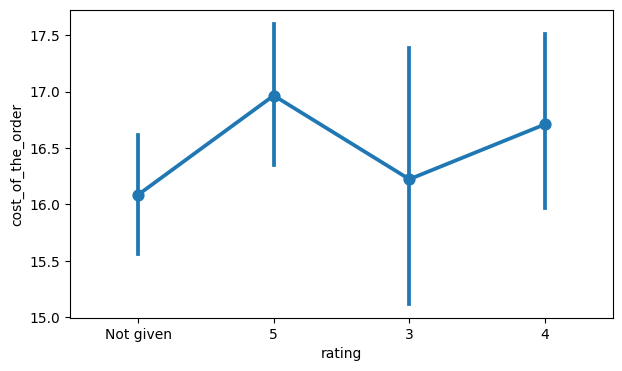

In [75]:
# Plotting between rating and Cost of Order
plt.figure(figsize=(7, 4))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = foodhub_data)
plt.show()

#### Delivery Time during various days of week

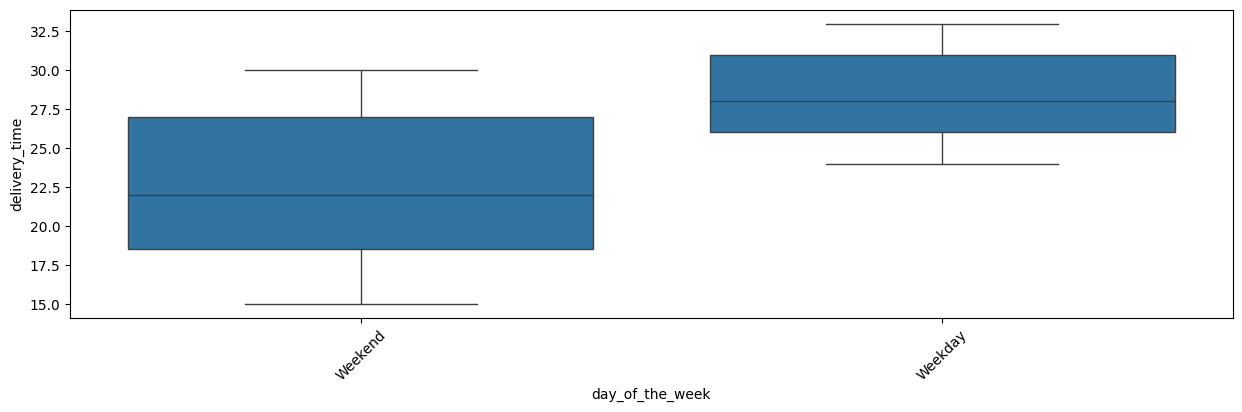

In [76]:
# Plotting between Delivery time and Days of week
plt.figure(figsize=(15,4))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = foodhub_data, showfliers=False)
plt.xticks(rotation = 45)
plt.show()

#### Correlation of numeric fields

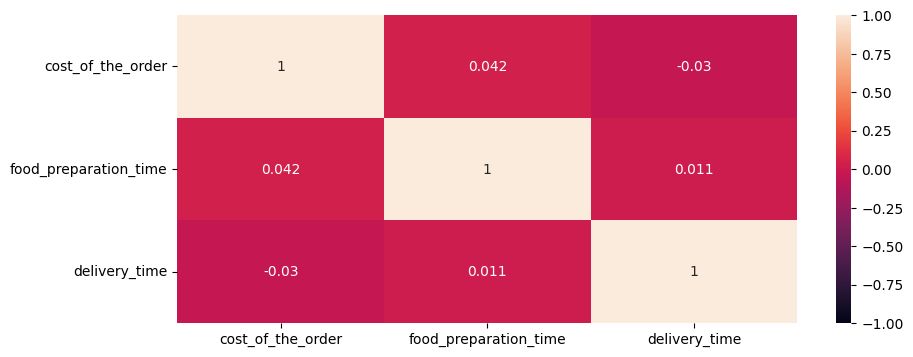

In [88]:
# Plot the heatmap
# We cannot take 'rating' into consideration as it has string data
table_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 4))
sns.heatmap(foodhub_data[table_columns].corr(), annot=True, vmin=-1, vmax=1 )
plt.show()

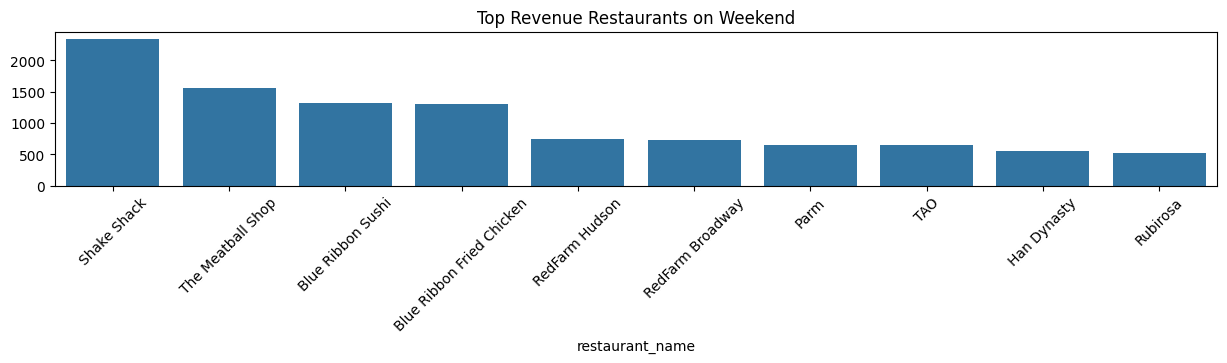

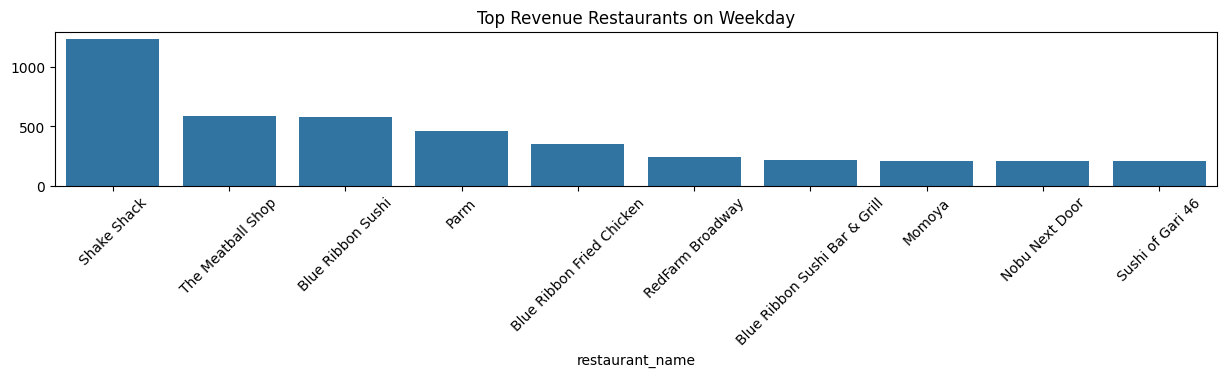

In [115]:
top_revenue_on_weekend = foodhub_data[foodhub_data['day_of_the_week']=='Weekend'].groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)
top_revenue_on_weekday = foodhub_data[foodhub_data['day_of_the_week']!='Weekend'].groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

# plot for top_revenue_on_weekend
plt.figure(figsize=(15,2))
sns.barplot(x = top_revenue_on_weekend.index, y = top_revenue_on_weekend.values)
plt.xticks(rotation = 45)
plt.title('Top Revenue Restaurants on Weekend')
plt.show()

# plot for top_revenue_on_weekday
plt.figure(figsize=(15,2))
sns.barplot(x = top_revenue_on_weekday.index, y = top_revenue_on_weekday.values)
plt.xticks(rotation = 45)
plt.title('Top Revenue Restaurants on Weekday')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [152]:
# Filter out the rows where rating is not present
foodhub_data_with_rating = foodhub_data[foodhub_data['rating']!='Not given'].copy().reset_index(drop=True)
# Update rating datatype for numeric calculation
foodhub_data_with_rating['rating'] = foodhub_data_with_rating['rating'].astype(int)

# Adding new columns to get the average rating and their count for restaurant
foodhub_data_with_rating['average_rating'] = foodhub_data_with_rating.groupby('restaurant_name')['rating'].transform('mean')
foodhub_data_with_rating['rating_count'] = foodhub_data_with_rating.groupby('restaurant_name')['rating'].transform('count')

# Filter Rating_Count > 50 and Average_rating > 4
qualified_restaurant = foodhub_data_with_rating[(foodhub_data_with_rating['rating_count']>50) & (foodhub_data_with_rating['average_rating']>4)]['restaurant_name'].unique()

print(f'\n\nList of restaurants fulfilling the criteria: {qualified_restaurant} \n\n')
# Display tabular data
foodhub_data_with_rating[(foodhub_data_with_rating['rating_count']>50) & (foodhub_data_with_rating['average_rating']>4)][['restaurant_name','average_rating','rating_count']].drop_duplicates().reset_index(drop=True)




List of restaurants fulfilling the criteria: ['Blue Ribbon Fried Chicken' 'Shake Shack' 'Blue Ribbon Sushi'
 'The Meatball Shop'] 




,restaurant_name,average_rating,rating_count
0,Blue Ribbon Fried Chicken,4.328125,64
1,Shake Shack,4.278195,133
2,Blue Ribbon Sushi,4.219178,73
3,The Meatball Shop,4.511905,84


#### Observations:

List of restaurants fulfilling the criteria:
* Blue Ribbon Fried Chicken
* Shake Shack
* Blue Ribbon Sushi
* The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [160]:
# function to determine the revenue
def revenue(x):
  '''
  Function to calculate Revenue -
  25% on the orders having cost greater than 20 dollars
  and 15% on the orders having cost greater than 5 dollars.
  '''
  if x > 20:
      return x*0.25
  elif x > 5:
      return x*0.15
  else:
      return x*0
# Adding new Column to determine Revenue per order
foodhub_data['Revenue'] = foodhub_data['cost_of_the_order'].apply(revenue)

# Calculate Total Revenue
total_rev = foodhub_data['Revenue'].sum()
print(f'The net revenue is around ${round(total_rev, 2)}')

The net revenue is around $6166.3


#### Observations:
The net revenue is around $6166.3

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [161]:
# Calculate total delivery time and add a new column to the dataframe
foodhub_data['total_delivery_time'] = foodhub_data['food_preparation_time'] + foodhub_data['delivery_time']

# Calculate percentage of orders that take more than 60
more_than_60 = foodhub_data[foodhub_data['total_delivery_time']>60].shape[0]
total_number_of_order = foodhub_data.shape[0]

result = (more_than_60/total_number_of_order)*100
print(f'Percentage of orders that take more than 60 minutes: {round(result,2)}%')


Percentage of orders that take more than 60 minutes: 10.54%


#### Observations:
Percentage of orders that take more than 60 minutes: 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [163]:
# Get the mean delivery time on weekdays
mean_delivery_time_weekday = foodhub_data[foodhub_data['day_of_the_week']!='Weekend']['delivery_time'].mean()
print(f'Mean delivery time on weekdays: {round(mean_delivery_time_weekday,2)} minutes')
# Get the mean delivery time on weekends
mean_delivery_time_weekend = foodhub_data[foodhub_data['day_of_the_week']=='Weekend']['delivery_time'].mean()
print(f'Mean delivery time on weekends: {round(mean_delivery_time_weekend,2)} minutes')


Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:
* Mean delivery time on weekdays: 28.34 minutes
* Mean delivery time on weekends: 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Based on the analysis of FoodHub order data, several key observations can be drawn:

* **Demand and Popularity**:
Shake Shack is the most popular restaurant with a significant number of orders, followed by The Meatball Shop and Blue Ribbon Sushi. American cuisine is particularly popular on weekends.

* **Order Value and Revenue**:
A significant percentage (29.24%) of orders cost more than $20. The company's revenue generation model, with varying commission rates based on order cost, contributes significantly to its revenue.

* **Delivery Performance**:
Average delivery time is around 24.16 minutes, with slight variations between weekdays and weekends. Approximately 10.54% of orders take more than 60 minutes for delivery.

* **Customer Satisfaction**:
A considerable number of orders (736, approximately 38.7%) lack customer ratings. Identifying reasons for unrated orders and encouraging more ratings would provide valuable insights.

* **Top-Performing Restaurants**:
Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi, and The Meatball Shop consistently achieve high average ratings and a substantial number of orders. These restaurants should be prioritized for promotional offers.

* **Weekday vs. Weekend Trends**:
Delivery time is faster on weekends compared to weekdays, potentially due to reduced traffic or different delivery patterns.

### Recommendations:

* Targeted Promotions: Offer promotional discounts to the top 3 most frequent customers (identified by customer IDs) and encourage higher customer engagement. Leverage promotional offers for restaurants with high average ratings and orders (like the top 4 mentioned).
* Customer Feedback Loop: Implement methods to gather more customer feedback. Encourage ratings for all orders, and consider offering incentives for providing reviews. Conduct customer surveys to explore reasons for not rating orders.
* Delivery Optimization: Investigate reasons for long delivery times (over 60 minutes). This could involve optimizing delivery routes, adjusting delivery personnel schedules, and enhancing real-time order tracking.
* Cuisine-Specific Strategies: Observe patterns in cuisine preferences and offer promotions based on peak demand times. Tailor promotional strategies for weekends and weekdays to better align with consumer behavior.
* Restaurant Partnerships: Foster strategic partnerships with high-performing restaurants (like the top 4 mentioned) to maintain high standards and customer satisfaction. Explore potential menu additions or collaborations based on customer preferences.

* Revenue Enhancement: Evaluate the effectiveness of the current commission structure based on order value. Consider a more flexible pricing strategy that caters to different restaurant segments or order types.
* Data-Driven Decision-Making: Continue monitoring key performance indicators (KPIs), such as delivery time, customer ratings, and revenue generation, to identify potential areas for improvement and measure the impact of implemented strategies.
* Delivery Time Analysis: Conduct more granular analysis of delivery times during peak hours or specific days. Analyze the impact of factors like traffic and weather on delivery times.

* Customer Segmentation:  Segment customer based on their ratings, preferences and past orders. Offer tailored promotions and suggestions based on identified patterns in each segment.
* Improve Data Quality: Address the missing values and incorrect data types to get accurate results. Implement checks to prevent such issues in the future.

---